In [99]:
#importing required libraries
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [100]:
#Loading Dataset
data = pd.read_csv('data.csv')
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [101]:
#split dataset in features and target variable
feature_cols = ['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
X = data.loc[:, feature_cols].values  # Features
y = data.loc[:,['target']].values      # Target variable

#Standardizing
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)


In [102]:
#PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.440873,-0.000092
1,-0.476757,0.084115
2,-0.461213,0.077991
3,-0.459700,0.701752
4,0.608178,0.141899
...,...,...
2012,-0.450256,-0.128606
2013,-0.422731,-0.409861
2014,-0.451521,-0.245166
2015,-0.418362,-0.045090


In [103]:
finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-0.440873,-0.000092,1
1,-0.476757,0.084115,1
2,-0.461213,0.077991,1
3,-0.459700,0.701752,1
4,0.608178,0.141899,1
...,...,...,...
2012,-0.450256,-0.128606,0
2013,-0.422731,-0.409861,0
2014,-0.451521,-0.245166,0
2015,-0.418362,-0.045090,0


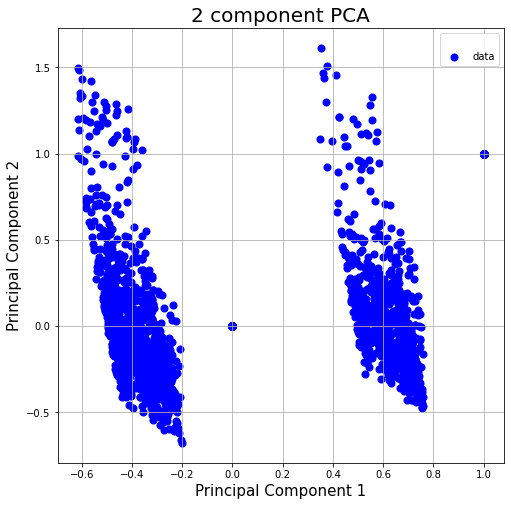

In [123]:
#Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [' ', 'data']
colors = ['w', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf[['target', 'principal component 1']], finalDf[['target', 'principal component 2']], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [105]:
pca.explained_variance_ratio_

array([0.3383367, 0.1721255])